# Load and Explore the Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart_disease.csv")

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
print("\nData types:")
print(df.dtypes)


Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [5]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.

In [6]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for sex:
sex
1    713
0    312
Name: count, dtype: int64

Value counts for cp:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Value counts for fbs:
fbs
0    872
1    153
Name: count, dtype: int64

Value counts for restecg:
restecg
1    513
0    497
2     15
Name: count, dtype: int64

Value counts for exang:
exang
0    680
1    345
Name: count, dtype: int64

Value counts for slope:
slope
1    482
2    469
0     74
Name: count, dtype: int64

Value counts for ca:
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Value counts for thal:
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

Value counts for target:
target
1    526
0    499
Name: count, dtype: int64


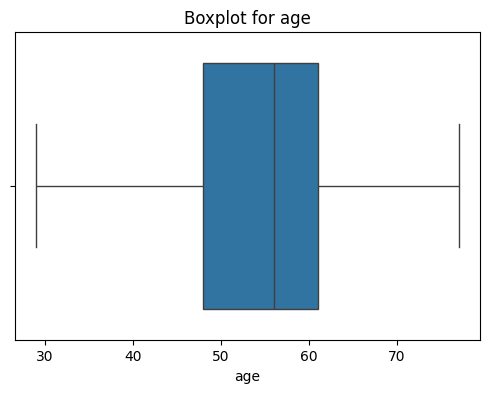

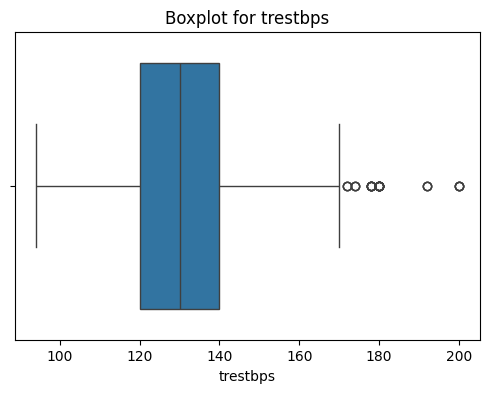

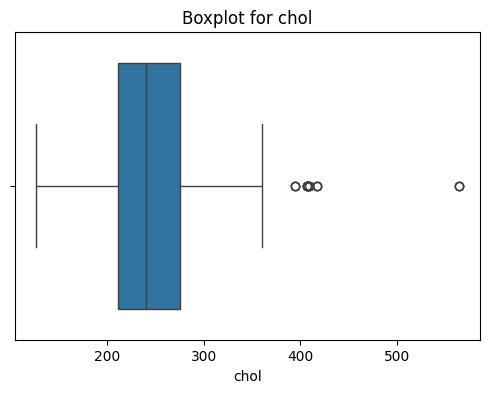

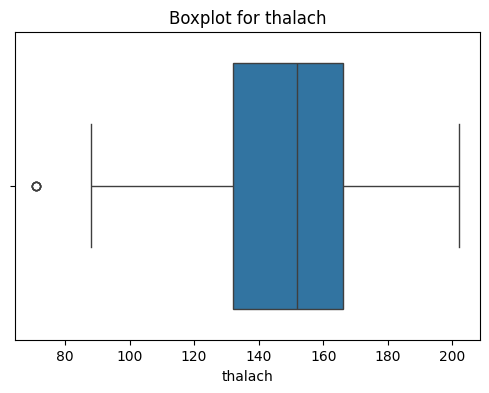

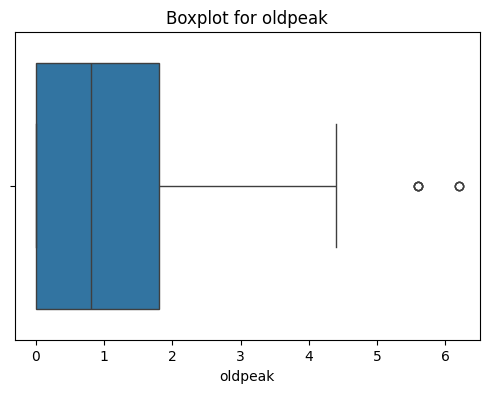

In [7]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

#  Data Cleaning and Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [9]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, num_cols)

In [10]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

In [11]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Preprocessing complete. Here's the updated DataFrame shape:", df.shape)

Preprocessing complete. Here's the updated DataFrame shape: (964, 19)


# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_reg = df.drop('chol', axis=1)
y_reg = df['chol']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [14]:
X_clf = df.drop('target', axis=1)
y_clf = df['target']

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Build Machine Learning Models

In [15]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_reg_train, y_reg_train)

LinearRegression()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

log_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

log_model.fit(X_clf_train, y_clf_train)
knn_model.fit(X_clf_train, y_clf_train)
nb_model.fit(X_clf_train, y_clf_train)

GaussianNB()

# Evaluate Models on Test Data

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_reg_pred = reg_model.predict(X_reg_test)

print("Regression Evaluation:")
print("MAE:", mean_absolute_error(y_reg_test, y_reg_pred))
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("R²:", r2_score(y_reg_test, y_reg_pred))

Regression Evaluation:
MAE: 0.76556086563252
MSE: 1.0284507808261925
R²: 0.00956839666919762


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

evaluate_model(log_model, X_clf_test, y_clf_test, "Logistic Regression")
evaluate_model(knn_model, X_clf_test, y_clf_test, "K-Nearest Neighbors")
evaluate_model(nb_model, X_clf_test, y_clf_test, "Naive Bayes")


Logistic Regression Evaluation:
Accuracy: 0.844559585492228
Precision: 0.8118811881188119
Recall: 0.8817204301075269
F1 Score: 0.845360824742268

K-Nearest Neighbors Evaluation:
Accuracy: 0.844559585492228
Precision: 0.8315789473684211
Recall: 0.8494623655913979
F1 Score: 0.8404255319148937

Naive Bayes Evaluation:
Accuracy: 0.8134715025906736
Precision: 0.8131868131868132
Recall: 0.7956989247311828
F1 Score: 0.8043478260869565
